# Hyperparameters lab

## Introduction

In this lesson, we'll use the California Housing dataset to train a decision tree and tune our hyperparameters.

## Working with the california housing dataset

Let's get started by loading up our data and splitting it.

In [57]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
dataset = fetch_california_housing()



X = pd.DataFrame(dataset['data'], columns = dataset['feature_names'])
y = dataset['target']

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.20, random_state=42)

X_validate, X_test, y_validate, y_test = train_test_split(
     X_test, y_test, test_size=0.5, random_state=42)

We split our data into training and test data.  Let's take a look at the first few rows of our data.

In [58]:
X[:3]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24


In [59]:
X.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

In [60]:
X.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

## Training our decision tree

Because all of our data is numeric, and we do not have any na values, we should be able to train our decision tree.

In [61]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

First check the score on the training set.

In [62]:
model.score(X_train, y_train)

# 0.9999999999999576

0.9999999999999576

But what matters more is how well we perform on the validation set.

In [63]:
model.score(X_validate, y_validate)

# 0.61295536247266

0.61295536247266

So we don't do as well on the test set, but we still don't perform too poorly.

### Setting parameters in SKLearn

Let's see if we can improve our model by tuning our hyperparameters.  We can do so by trying different `max_depth` between 1 and 20, and assessing the score.

In [64]:
max_depths = list(range(1, 21))

Use list comprehension to train 20 different DecisionTreeRegressors, one for each `max_depth` number. 

> Set the `random_state` equal to 1 each time.

In [65]:
models = [DecisionTreeRegressor(max_depth = idx, random_state = 1).fit(X_train, y_train) for idx in max_depths]

In [66]:
[model.get_params()['max_depth'] for model in models[:3]]
# [1, 2, 3]

[1, 2, 3]

In [67]:
len(models)

# 20

20

Now check the score for each one of the models, by evaluating with the test set.

In [70]:
scores = [model.score(X_validate, y_validate) for model in models]


In [72]:
scores[:3]

# [0.28069043687407513, 0.4289787573918531, 0.5124709407245538]

[0.28069043687407513, 0.4289787573918531, 0.5124709407245538]

Next let's we'll use matplotlib to get a sense of which value for `max_depth` performs the best.

[Text(0, 0.5, 'score'), Text(0.5, 0, 'max depth')]

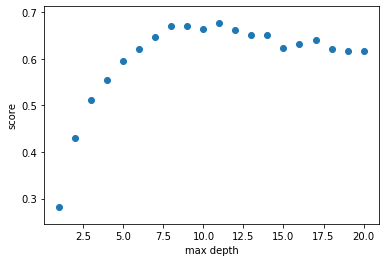

In [74]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
max_depths = list(range(1, 21))
ax.scatter(max_depths, scores)
ax.set(xlabel = 'max depth', ylabel = 'score')

So we can see that our model performs best when we have max levels of 10.  Let's train and score the model again, with a hyperparameter of 10.

> Set the random_state = 1.

In [76]:
model_max_depth = DecisionTreeRegressor(max_depth = 10, random_state = 1)
model_max_depth.fit(X_train, y_train).score(X_validate,y_validate)
# 0.6644452398966554

0.6644452398966554

So we can see that we slightly improve our score score by tuning our `max_depth` hyperparameter.

### Tuning Min Samples Leaf

Now let's try tuning the decision trees by working with the `min_samples_leaf` hyperparameter.  

Try a range of values from 5 to 100, going by 5.

In [22]:
min_samples = list(range(5, 105, 5))

len(min_samples)
# 20

20

In [56]:
min_samples[:3]
# [5, 10, 15]

[5, 10, 15]

Next initialize and fit 20 decision trees, one for each number of `min_samples`.  Use an increasing number of `min_samples_leaf` to fit the model.

> Set the `random_state = 1`, for each model.

In [77]:
models_min_samples = [DecisionTreeRegressor(min_samples_leaf = min_sample, random_state = 1).fit(X_train, y_train) for min_sample in min_samples]


In [78]:
len(models_min_samples)

# 20

20

Next evaluate the score for each of the models on the validation set.

In [79]:
min_sample_scores = [model.score(X_validate, y_validate) for model in models]

In [81]:
min_sample_scores[:3]
# [0.28069043687407513, 0.4289787573918531, 0.5124709407245538]

[0.28069043687407513, 0.4289787573918531, 0.5124709407245538]

Then plot, the number of `min_sample_leafs` as well as the related scores.

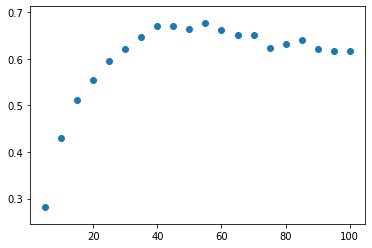

In [83]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(min_samples, scores)

Note that we can also display our values as a dataframe.  Create a dataframe that displays each of the min_samples as well as the corresponding scores.

In [84]:
df_min_samples = pd.DataFrame({'min_samples': min_samples, 'scores': scores})


In [86]:
df_min_samples[:15]
# 	min_samples	scores
# 0	5	0.696287
# 1	10	0.722790
# 2	15	0.726977
# 3	20	0.727308
# 4	25	0.721153
# 5	30	0.716878
# 6	35	0.712360
# 7	40	0.711577
# 8	45	0.705579
# 9	50	0.703089

,min_samples,scores
0,5,0.280690
1,10,0.428979
2,15,0.512471
3,20,0.553604
4,25,0.596268
5,30,0.621860
6,35,0.647215
7,40,0.671255
8,45,0.671052
9,50,0.664445


It seems that we peak right around 45 min samples.  Let's use this for `min_samples_leaf` and evaluate on our test set.  Combine the X_train and X_validate, and y_train and y_validate datasets.  Set them to `comb_X` and `comb_y` respectively.

In [97]:
dtr = DecisionTreeRegressor(min_samples_leaf = 45)
comb_X = pd.concat([X_train, X_validate])
comb_y = pd.concat([pd.Series(y_train), pd.Series(y_validate)], axis = 0)
# 
dtr.fit(comb_X, comb_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=45,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [98]:
dtr.score(X_test, y_test)

# 0.6990583479724606

0.6990583479724606

### Summary

In this lesson, we practiced tuning the hyperparameter in a single decision tree.  We did so by looping through different values for our hyperparameter and then choosing the hyperparameter that results in the highest score on our holdout set.  In future lessons, we'll be using this same technique to choose our hyperparameters as we move to random forests.